In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import geoplot
import matplotlib.image as mpimg


In [23]:
airbnb: pd.DataFrame = pd.read_csv(r'bases\AB_NYC_2019.csv')

In [24]:
airbnb.shape

(48895, 16)

In [25]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

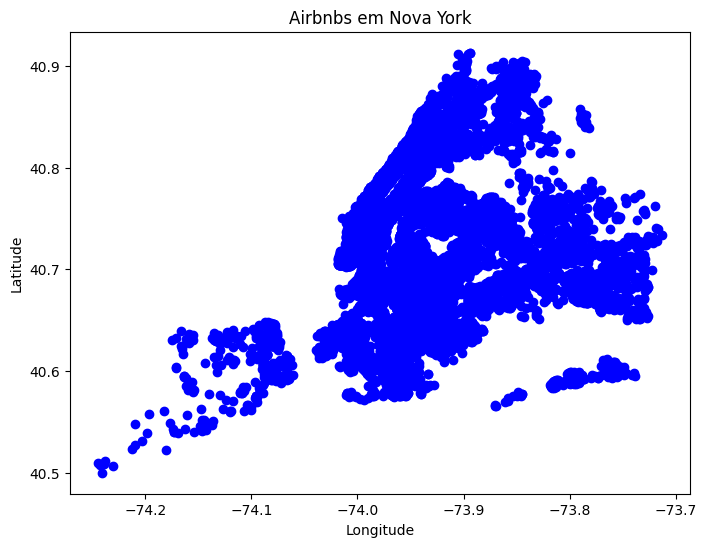

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(airbnb['longitude'], airbnb['latitude'], c='blue', marker='o')

plt.title('Airbnbs em Nova York')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

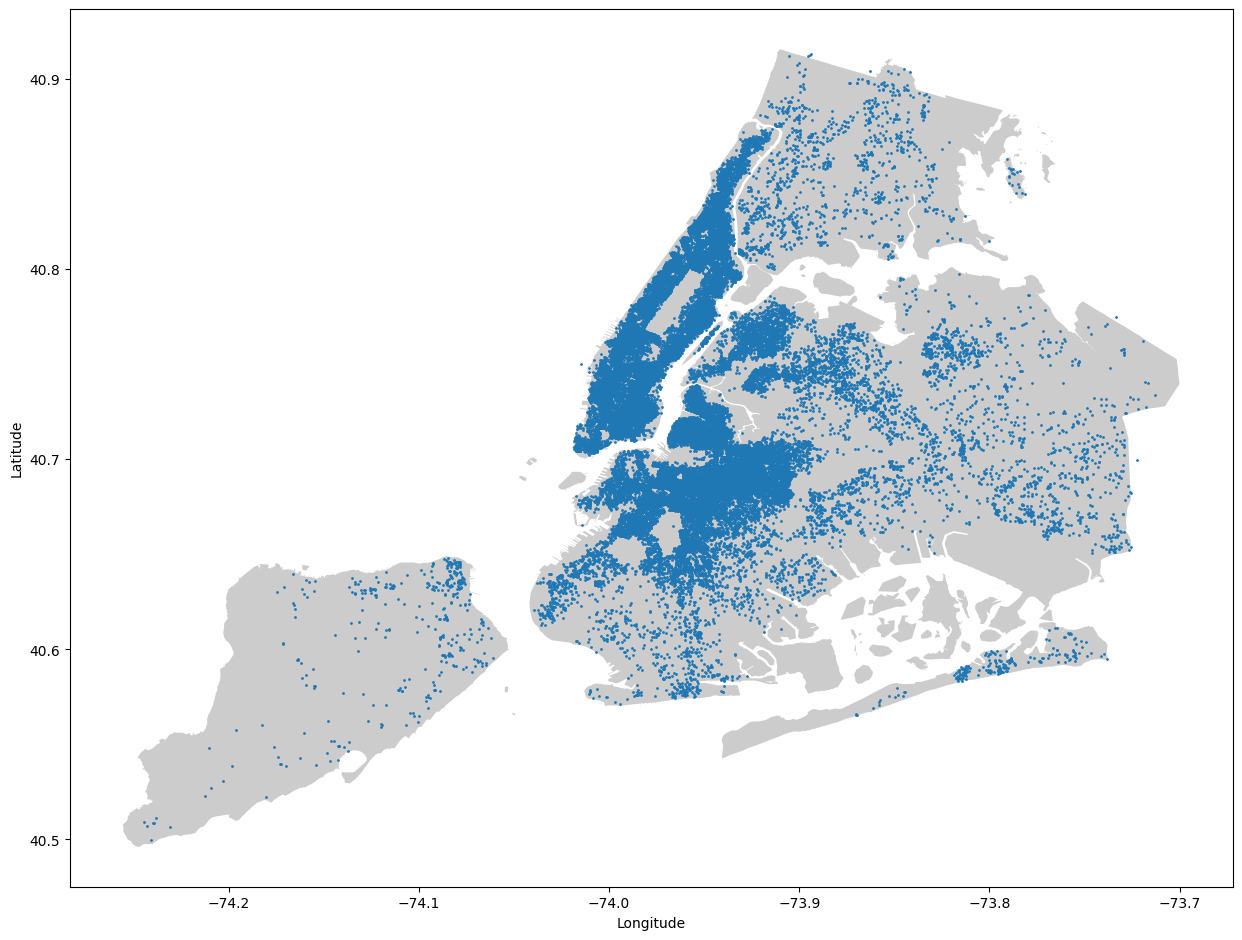

In [27]:
boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geo_df = geopandas.GeoDataFrame(
    airbnb, geometry=geopandas.points_from_xy(
        airbnb["longitude"], airbnb["latitude"]
    )
)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
base = boroughs.plot(ax=ax, alpha=0.4, color="grey")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
geo_df.plot(ax=base, markersize=1)

In [30]:
img = mpimg.imread(r'bases\New_York_City_.png')

extent = [-74.02, -73.95, 40.70, 40.78]

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(img, extent=extent, aspect='auto')

# Plotando os pontos de latitude e longitude
ax.scatter(airbnb['longitude'], airbnb['latitude'], c='blue', marker='o', s=100)

# Ajustando os rótulos e título
plt.title('Airbnb em Nova York')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibindo o gráfico
plt.show()


SyntaxError: not a PNG file (<string>)